In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/preprocessed_DNN (5).csv', low_memory=False)
df

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df['Attack_type'].value_counts()

,count
Attack_type,
Normal,12264
DDoS_UDP,7493
DDoS_ICMP,6705
DDoS_HTTP,5444
SQL_injection,5278
DDoS_TCP,5261
Uploading,5156
Password,5084
Vulnerability_scanner,5065


In [ ]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)

In [ ]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [ ]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [ ]:
df[skip_list[3]].value_counts()

,count
mqtt.msg_decoded_as,
0.0,77648


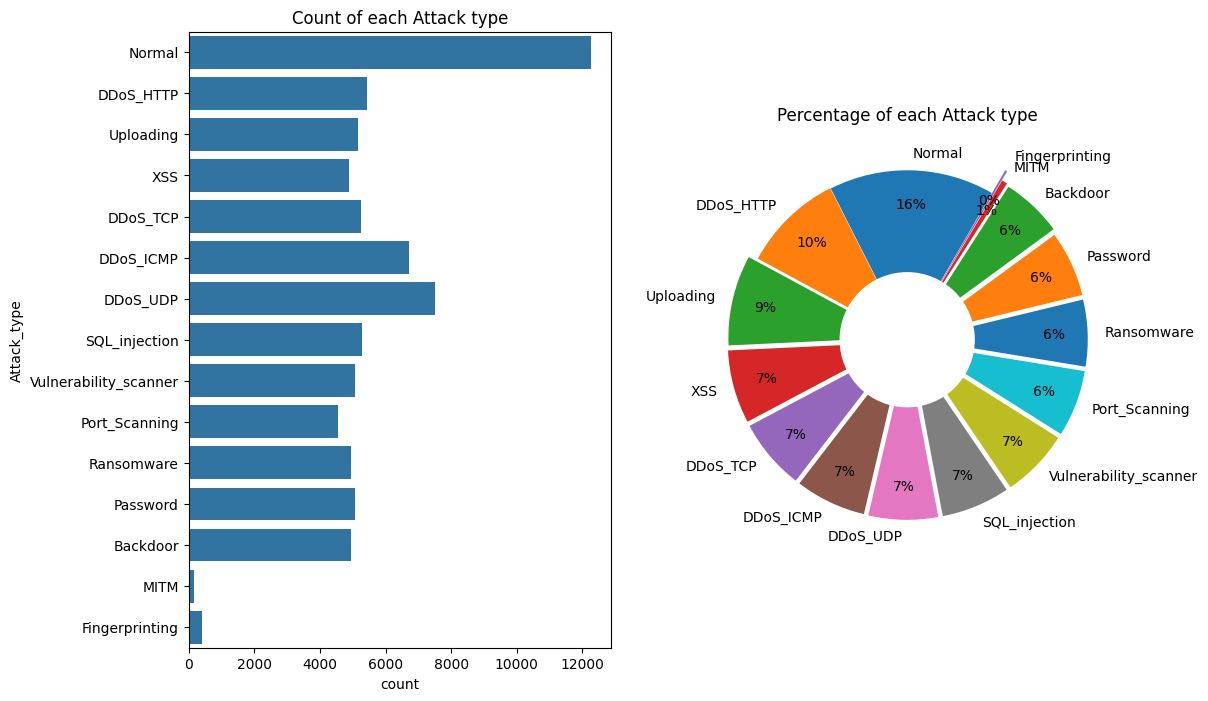

In [ ]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

In [ ]:
X = df.drop([label_col], axis=1)
y = df[label_col]

# Drop rows with NaN values in the target variable 'y'
nan_rows = y.isnull()
X = X[~nan_rows]
y = y[~nan_rows]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(62118, 68) (15530, 68) (62118,) (15530,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr =  LogisticRegression()
dt = DecisionTreeClassifier()

In [ ]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [ ]:
lr_preds = lr.predict(X_test)
dt_preds = dt.predict(X_test)

In [ ]:
lr_pred = accuracy_score(lr_preds, y_test)
dt_pred = accuracy_score(dt_preds, y_test)
print(lr_pred)
print(dt_pred)

0.6518995492594978
0.8923374114616871


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_preds)
cm

array([[ 742,   83,    0,    0,    0,    0,    0,    0,   16,   19,  117,
           0,   11,    1,    0],
       [ 212,  572,    0,    0,    0,    2,    0,    0,   74,    0,  138,
          53,    2,   19,   17],
       [   0,    0, 1317,    0,   12,   12,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,  618,    0,    0,    0,    0,    0,  423,    0,
           0,   11,    0,    0],
       [   0,    0,    1,    0, 1498,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,   15,   18,    0,    3,   35,    0,    0,    0,   12,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    4,    0,   27,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2453,    0,    0,    0,
           0,    0,    0,    0],
       [ 180,   84,    0,    0,    0,    0,    0,    0,  280,    0,  182,
         250,    0,   36,    5],
       [   0,   10,    0,    1,    0,

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(rf_preds, y_test)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8992273019961365


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(svm_preds, y_test)
print("SVM Accuracy:", svm_acc)

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(knn_preds, y_test)
print("KNN Accuracy:", knn_acc)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_acc = accuracy_score(xgb_preds, y_test)
print("XGBoost Accuracy:", xgb_acc)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
nb_acc = accuracy_score(nb_preds, y_test)
print("Naive Bayes Accuracy:", nb_acc)

In [ ]:
!pip install shap
import shap

In [ ]:
# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Visualize a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_test.iloc[0, :])

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming 'rf_classifier', 'X_test', and 'explainer' are already defined

# Calculate SHAP values for the entire test set
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values[1], X_test, show=False)

# Show the plot
plt.show()
